In [31]:
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
ruta_csv = '../lab-eda-univariate/amz_uk_price_prediction_dataset.csv'

# Cargar el CSV
df = pd.read_csv(ruta_csv)

# Mostrar las primeras filas para verificar
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*

In [33]:
df['category'].dropna(inplace=True)
df['isBestSeller'].dropna(inplace=True)

In [34]:
crosstab_cat_bestseller = pd.crosstab(df['category'], df['isBestSeller'])

In [35]:
crosstab_cat_bestseller

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [36]:
proportion_best_sellers = pd.crosstab(df['category'], df['isBestSeller'], normalize='index')

In [37]:
best_seller_proportion = proportion_best_sellers[True]
best_seller_proportion

category
3D Printers                       0.004032
3D Printing & Scanning            0.000492
Abrasive & Finishing Products     0.020000
Action Cameras                    0.000589
Adapters                          0.011811
                                    ...   
Wind Instruments                  0.028000
Window Treatments                 0.020921
Women                             0.011985
Women's Sports & Outdoor Shoes    0.010209
eBook Readers & Accessories       0.000000
Name: True, Length: 296, dtype: float64

In [38]:
sorted_best_seller_proportion = best_seller_proportion.sort_values(ascending=False)
sorted_best_seller_proportion.head(10)

category
Grocery                           0.058135
Smart Home Security & Lighting    0.057692
Health & Personal Care            0.057686
Mobile Phone Accessories          0.042471
Power & Hand Tools                0.035339
Billiard, Snooker & Pool          0.032129
Pet Supplies                      0.030200
Home Brewing & Wine Making        0.028455
Wind Instruments                  0.028000
Mirrors                           0.028000
Name: True, dtype: float64

2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

In [39]:
chi2_statistic, chi2_p_value, dof, expected = chi2_contingency(crosstab_cat_bestseller)


In [40]:
print("\nResultados del Test Chi-Cuadrado:")
print(f"Estadístico chi-cuadrado: {chi2_statistic}")
print(f"Valor p: {chi2_p_value}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(expected)

alpha = 0.05  # Nivel de significancia
valor_critico = chi2.ppf(1 - alpha, dof)

print(f"Valor crítico: {valor_critico}")


Resultados del Test Chi-Cuadrado:
Estadístico chi-cuadrado: 36540.20270061387
Valor p: 0.0
Grados de libertad: 295
Frecuencias esperadas:
[[2.47190130e+02 8.09870149e-01]
 [4.05371878e+03 1.32812173e+01]
 [2.49183599e+02 8.16401360e-01]
 [1.69145827e+03 5.54173243e+00]
 [2.53170536e+02 8.29463782e-01]
 [8.50214439e+03 2.78556144e+01]
 [1.06650580e+02 3.49419782e-01]
 [2.57157474e+02 8.42526204e-01]
 [9.51781673e+03 3.11832664e+01]
 [1.50008526e+04 4.91473619e+01]
 [9.32544700e+03 3.05530045e+01]
 [2.38219520e+02 7.80479700e-01]
 [3.22941944e+03 1.05805616e+01]
 [9.44704859e+03 3.09514084e+01]
 [6.68808779e+03 2.19122125e+01]
 [5.26275760e+02 1.72423967e+00]
 [1.90296531e+04 6.23469391e+01]
 [2.77191835e+03 9.08164873e+00]
 [2.53170536e+02 8.29463782e-01]
 [4.04674164e+02 1.32583581e+00]
 [1.92489346e+04 6.30653723e+01]
 [3.10482764e+03 1.01723609e+01]
 [2.04330551e+02 6.69449115e-01]
 [6.28839730e+03 2.06027047e+01]
 [5.23385231e+03 1.71476942e+01]
 [9.52180367e+03 3.11963288e+01]
 [2

In [41]:
alpha = 0.05
if chi2_p_value < alpha:
    print("Reject the null hypothesis: There is an association between category and best-seller status.")
else:
    print("Fail to reject the null hypothesis: There is no association between category and best-seller status.")

Reject the null hypothesis: There is an association between category and best-seller status.


In [42]:
def cramers_v(confusion_matrix):
    chi2 = chi2_statistic
    n = np.sum(confusion_matrix)
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

cramers_v_value = cramers_v(crosstab_cat_bestseller.values)
print(f"Cramér's V: {cramers_v_value}")

Cramér's V: 0.1222829439760564


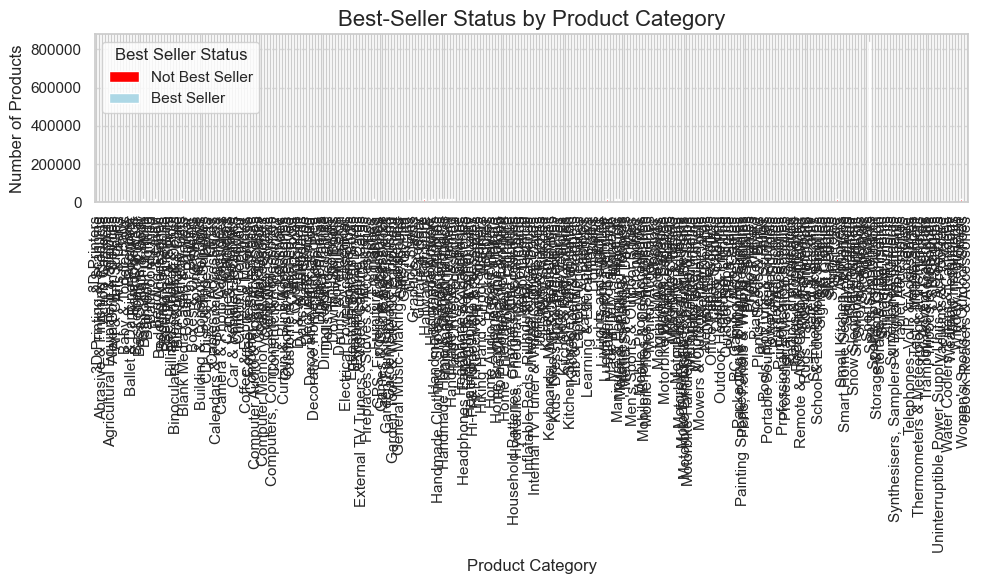

In [43]:
crosstab_cat_bestseller.columns = ['Not Best Seller', 'Best Seller'] 

crosstab_cat_bestseller.plot(kind='bar', stacked=True, color=['red', 'lightblue'], figsize=(10, 6))

plt.title('Best-Seller Status by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.xticks(rotation=90) 
plt.legend(title='Best Seller Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


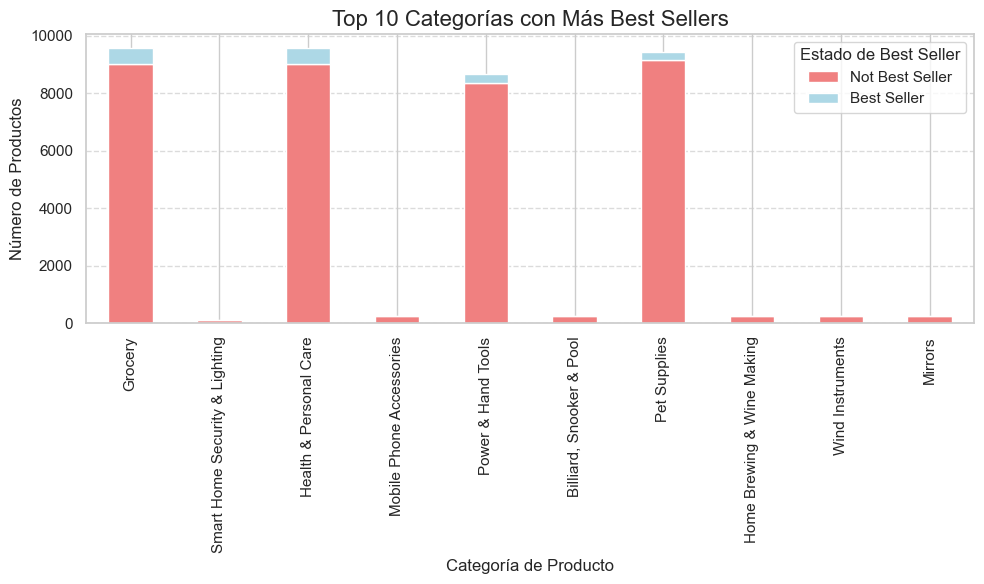

In [44]:
crosstab_cat_bestseller['Total'] = crosstab_cat_bestseller['Not Best Seller'] + crosstab_cat_bestseller['Best Seller']
crosstab_cat_bestseller['Proporción Best Seller'] = crosstab_cat_bestseller['Best Seller'] / crosstab_cat_bestseller['Total']

top_categories = crosstab_cat_bestseller.sort_values(by='Proporción Best Seller', ascending=False).head(10)

top_categories[['Not Best Seller', 'Best Seller']].plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue'], figsize=(10, 6))

plt.title('Top 10 Categorías con Más Best Sellers', fontsize=16)
plt.xlabel('Categoría de Producto', fontsize=12)
plt.ylabel('Número de Productos', fontsize=12)
plt.xticks(rotation=90)  
plt.legend(title='Estado de Best Seller')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [45]:
crosstab_cat_bestseller['Proporción Best Seller']

category
3D Printers                       0.004032
3D Printing & Scanning            0.000492
Abrasive & Finishing Products     0.020000
Action Cameras                    0.000589
Adapters                          0.011811
                                    ...   
Wind Instruments                  0.028000
Window Treatments                 0.020921
Women                             0.011985
Women's Sports & Outdoor Shoes    0.010209
eBook Readers & Accessories       0.000000
Name: Proporción Best Seller, Length: 296, dtype: float64

In [46]:
top_categories = crosstab_cat_bestseller.sort_values(by='Proporción Best Seller', ascending=False).head(10)
top_categories

,Not Best Seller,Best Seller,Total,Proporción Best Seller
category,,,,
Grocery,9008,556,9564,0.058135
Smart Home Security & Lighting,98,6,104,0.057692
Health & Personal Care,9017,552,9569,0.057686
Mobile Phone Accessories,248,11,259,0.042471
Power & Hand Tools,8353,306,8659,0.035339
"Billiard, Snooker & Pool",241,8,249,0.032129
Pet Supplies,9152,285,9437,0.030200
Home Brewing & Wine Making,239,7,246,0.028455
Wind Instruments,243,7,250,0.028000


### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*


In [47]:
df_clean_price= df.dropna(subset=['price'])

Q1_price= df_clean_price['price'].quantile(0.25)
Q3_price= df_clean_price['price'].quantile(0.75)
IQR_price= Q3_price - Q1_price

df_clean_price['price'] = np.where(df_clean_price['price'] > Q3_price + 1.5 * IQR_price, Q3_price + 1.5 * IQR_price, df_clean_price['price'])

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

In [48]:
top_categories = df_clean_price['category'].value_counts().nlargest(20).index
df_top_categories = df_clean_price[df_clean_price['category'].isin(top_categories)]

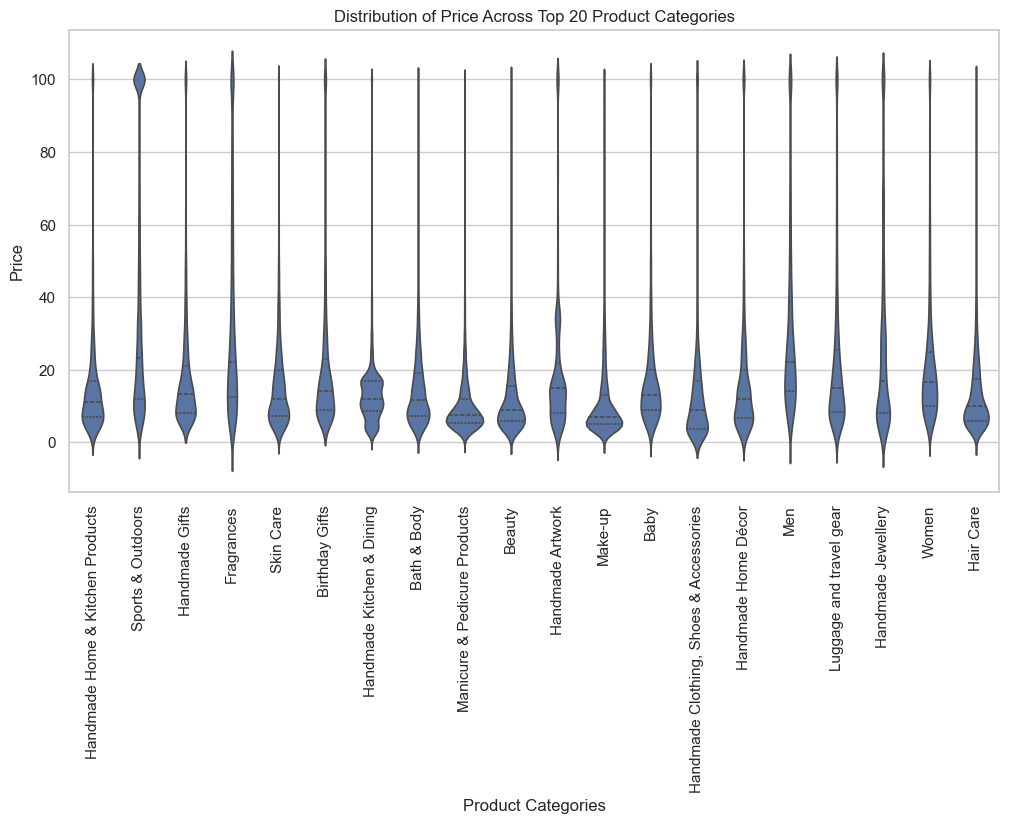

In [49]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='category', y='price', data=df_top_categories, inner="quartile")
plt.xticks(rotation=90)
plt.title('Distribution of Price Across Top 20 Product Categories')
plt.xlabel('Product Categories')
plt.ylabel('Price')
plt.show()

In [50]:
df_top_categories

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
19513,21072,B09477KHQ3,"Personalised Birthday Print Gift ""THE YEAR YOU...",4.5,763,7.99,False,900,Handmade Home & Kitchen Products
19514,21073,B0BSRFQYG8,Wax Melts 4 Bars | Build Your Own Box (Choose ...,3.9,117,6.49,True,800,Handmade Home & Kitchen Products
19515,21074,B09N9GVHV9,"Personalised Birthday Print Gift ""ON THE DAY/Y...",4.6,1155,8.99,True,600,Handmade Home & Kitchen Products
19516,21075,B0BRYGV7PQ,Fresh Wax Melts - Laundry Type Wax Melts - Str...,4.5,56,4.99,True,500,Handmade Home & Kitchen Products
19517,21076,B0B1JHB28R,Manta Makes Work Leaving Gifts | I Used to Wor...,4.7,261,9.95,True,400,Handmade Home & Kitchen Products
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


In [51]:
Q1_price_top_categories = df_top_categories['price'].quantile(0.25)
Q3_price_top_categories= df_top_categories['price'].quantile(0.75)
IQR_price_top_categories= Q3_price_top_categories - Q1_price_top_categories



In [52]:
df_top_categories['price'] = np.where(df_top_categories['price'] > Q3_price_top_categories + 1.5 * IQR_price_top_categories, Q3_price_top_categories + 1.5 * IQR_price_top_categories, df_top_categories['price'])

/var/folders/b7/hph07_m53vv3yzmmfgf8b7fm0000gn/T/ipykernel_10065/2488261290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_categories['price'] = np.where(df_top_categories['price'] > Q3_price_top_categories + 1.5 * IQR_price_top_categories, Q3_price_top_categories + 1.5 * IQR_price_top_categories, df_top_categories['price'])


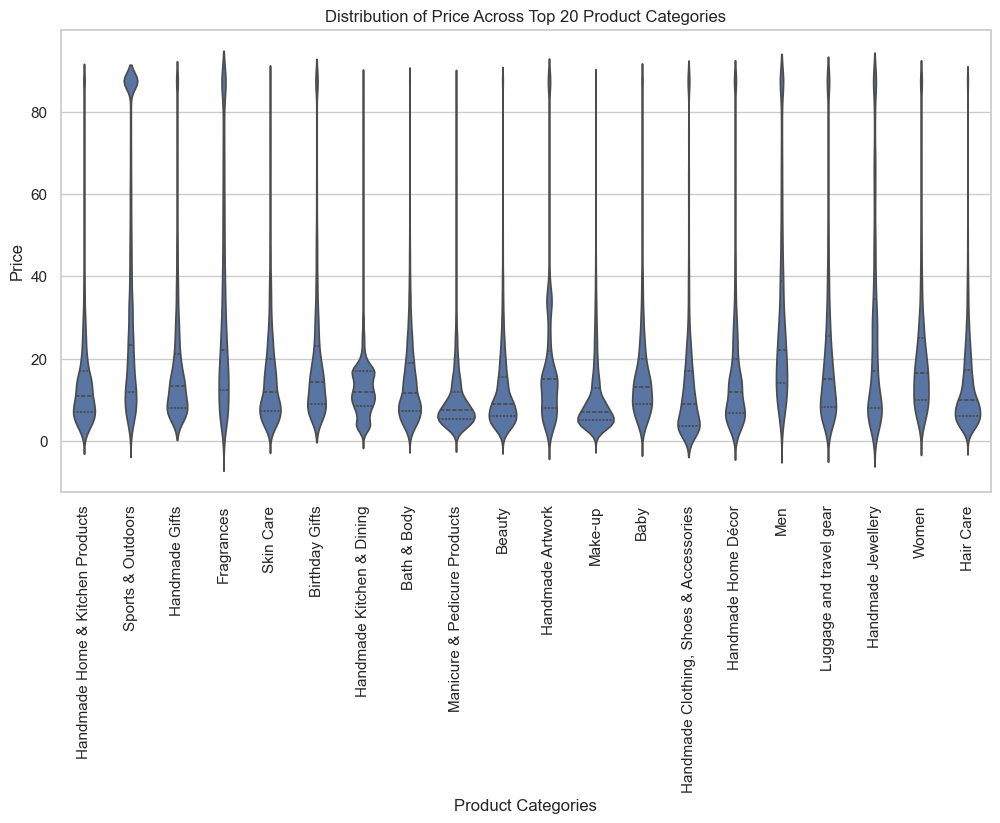

In [53]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='category', y='price', data=df_top_categories, inner="quartile")
plt.xticks(rotation=90)
plt.title('Distribution of Price Across Top 20 Product Categories')
plt.xlabel('Product Categories')
plt.ylabel('Price')
plt.show()

In [54]:
median_price_by_category = df_top_categories.groupby('category')['price'].median()

highest_median_category = median_price_by_category.idxmax()
highest_median_value = median_price_by_category.max()

print(f"product category with highest median price is '{highest_median_category}' with {highest_median_value}.")

product category with highest median price is 'Sports & Outdoors' with 23.3.


In [55]:
median_price_ = df.groupby('category')['price'].median()

highest_median_category = median_price_.idxmax()
highest_median_value = median_price_.max()

print(f"product category with highest median price is '{highest_median_category}' with {highest_median_value}.")

product category with highest median price is 'Laptops' with 1042.725.


2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

In [57]:
top_ten_categories = df_clean_price['category'].value_counts().nlargest(10).index
df_top_10_categories = df[df['category'].isin(top_ten_categories)]
average_price_by_category = df_top_10_categories.groupby('category')['price'].mean().reset_index()


/var/folders/b7/hph07_m53vv3yzmmfgf8b7fm0000gn/T/ipykernel_10065/3269977291.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='price', data=average_price_by_category, palette='viridis')


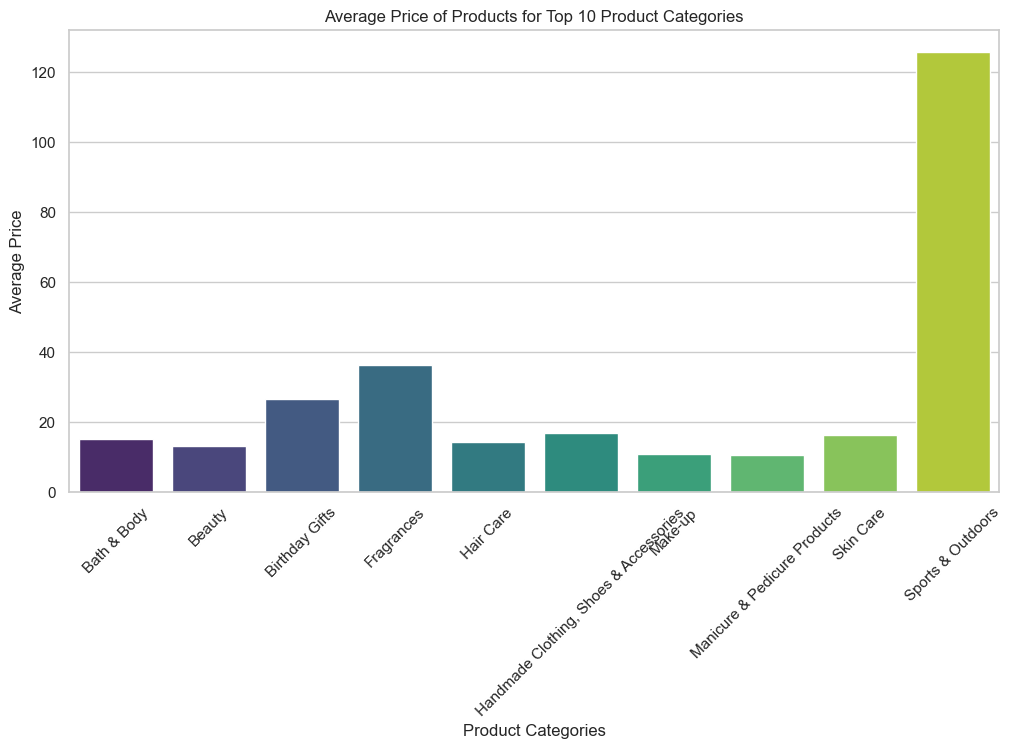

In [58]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='price', data=average_price_by_category, palette='viridis')
plt.xticks(rotation=45)
plt.title('Average Price of Products for Top 10 Product Categories')
plt.xlabel('Product Categories')
plt.ylabel('Average Price')
plt.show()

In [59]:
average_price_all_categories = df.groupby('category')['price'].mean()

highest_average_category = average_price_all_categories.idxmax()
highest_average_value = average_price_all_categories.max()

print(f"The product category with the highest average price is '{highest_average_category}' with an average price of {highest_average_value:.2f}.")

The product category with the highest average price is 'Laptops' with an average price of 1087.99.


3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

/var/folders/b7/hph07_m53vv3yzmmfgf8b7fm0000gn/T/ipykernel_10065/3345981162.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='stars', data=df_top_10_categories, palette='Set3')


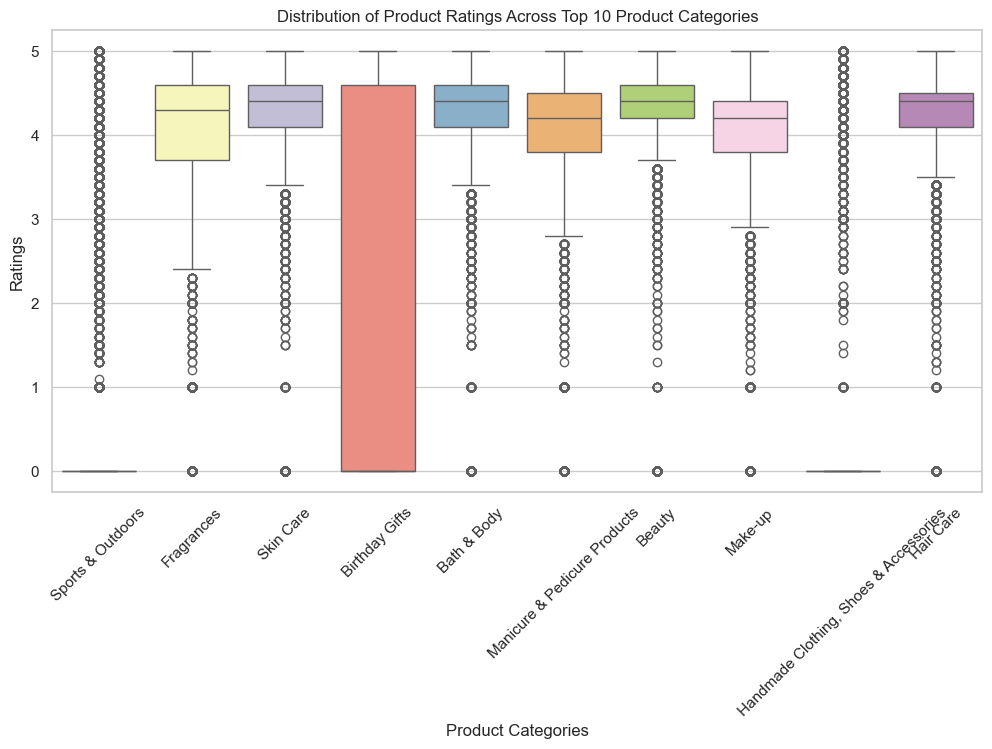

In [61]:
sns.set(style="whitegrid")

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='stars', data=df_top_10_categories, palette='Set3')
plt.xticks(rotation=45)
plt.title('Distribution of Product Ratings Across Top 10 Product Categories')
plt.xlabel('Product Categories')
plt.ylabel('Ratings')
plt.show()

In [63]:

median_rating_by_category = df.groupby('category')['stars'].median()

highest_median_category = median_rating_by_category.idxmax()
highest_median_value = median_rating_by_category.max()

print(f"The product category with the highest median rating is '{highest_median_category}' with a median rating of {highest_median_value}.")


The product category with the highest median rating is 'Computer Memory' with a median rating of 4.7.


### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

In [65]:
correlation = df['price'].corr(df['stars'])
print(f"The correlation coefficient between product price and rating is {correlation:.4f}")

The correlation coefficient between product price and rating is -0.1249


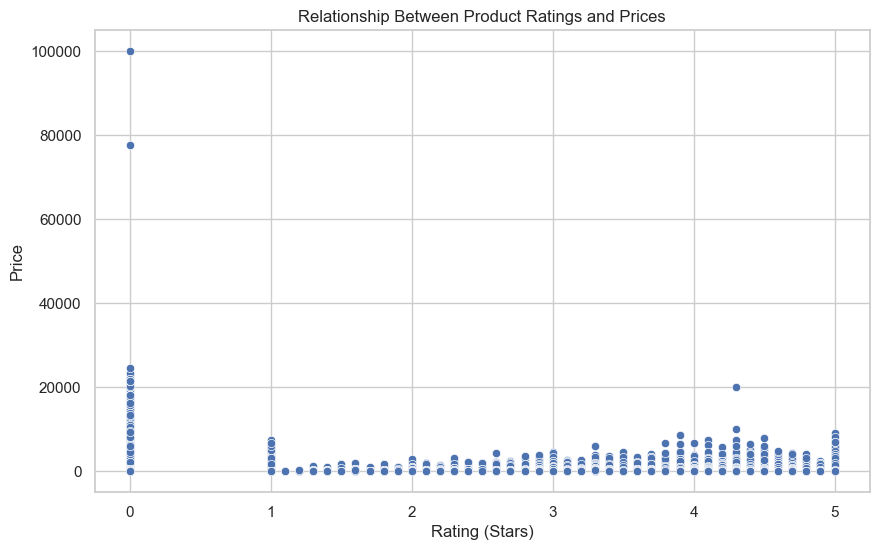

In [66]:
plt.figure(figsize=(10, 6))

# Create scatter plot
sns.scatterplot(x='stars', y='price', data=df)

# Add plot title and labels
plt.title('Relationship Between Product Ratings and Prices')
plt.xlabel('Rating (Stars)')
plt.ylabel('Price')

# Show plot
plt.show()